In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import count
import collections
from random import randint
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
from sklearn.metrics import mean_squared_error

In [2]:
cdata = pd.read_excel("input/new.xls")

In [3]:
cdata.head()

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,ANDHRA PRADESH,RAPE,1150,1340,1237,1443,1415,1360,1436,1531,1487,1761,1758,1664
1,ARUNACHAL PRADESH,RAPE,51,61,35,56,38,40,57,37,60,49,47,47
2,ASSAM,RAPE,928,1019,1188,1233,1406,1290,1477,1445,1644,1629,1470,1626
3,BIHAR,RAPE,1400,1304,1120,1157,1455,1451,1816,1464,1086,892,1185,1327
4,CHHATTISGARH,RAPE,1134,1214,1020,1144,1107,1211,1146,1108,1128,1198,1257,1214


In [4]:
cid = int(input('Enter the customer ID: '))

Enter the customer ID: 0


In [5]:
cdata = cdata.iloc[cid][2:]
cdata.head()

2001    1150
2002    1340
2003    1237
2004    1443
2005    1415
Name: 0, dtype: object

In [6]:
cdata_as_frame = pd.DataFrame({'Year':cdata.index,'Crimes':cdata.values})
cdata_as_frame.to_csv('output/testdata.csv',index=False)

In [7]:
data = pd.read_csv("output/testdata.csv")

In [8]:
data_as_frame = pd.DataFrame(data, columns=['Year', 'Crimes'])
data_as_frame.tail()

,Year,Crimes
7,2008,1531
8,2009,1487
9,2010,1761
10,2011,1758
11,2012,1664


In [9]:
x = data_as_frame['Year']
Y = data_as_frame['Crimes']

In [10]:
print(Y)

0     1150
1     1340
2     1237
3     1443
4     1415
5     1360
6     1436
7     1531
8     1487
9     1761
10    1758
11    1664
Name: Crimes, dtype: int64


In [11]:
window_size= 2
window = np.ones(int(window_size))/float(window_size)

In [12]:
print(window)

[0.5 0.5]


In [13]:
moving_average = np.convolve(Y, window, 'same')
print(moving_average)

[ 575.  1245.  1288.5 1340.  1429.  1387.5 1398.  1483.5 1509.  1624.
 1759.5 1711. ]


In [14]:
len(moving_average)

12

In [15]:
avg = moving_average.tolist()
print(avg)

[575.0, 1245.0, 1288.5, 1340.0, 1429.0, 1387.5, 1398.0, 1483.5, 1509.0, 1624.0, 1759.5, 1711.0]


In [16]:
#residual
residual = Y - avg
print(type(residual))

<class 'pandas.core.series.Series'>


In [17]:
residual.head()

0    575.0
1     95.0
2    -51.5
3    103.0
4    -14.0
Name: Crimes, dtype: float64

In [18]:
std = np.std(residual)
std

163.64154593365205

In [19]:
testing_std = residual.rolling(window_size).std()
testing_std_as_df = pd.DataFrame(testing_std)
rolling_std = testing_std_as_df.replace(np.nan,testing_std_as_df.iloc[window_size - 1]).round(3).iloc[:,0].tolist()

In [20]:
avg_list = avg
text_xlabel="Year"
text_ylabel="Crime count"
applying_rolling_std=False

Text(0, 0.5, 'Crime count')

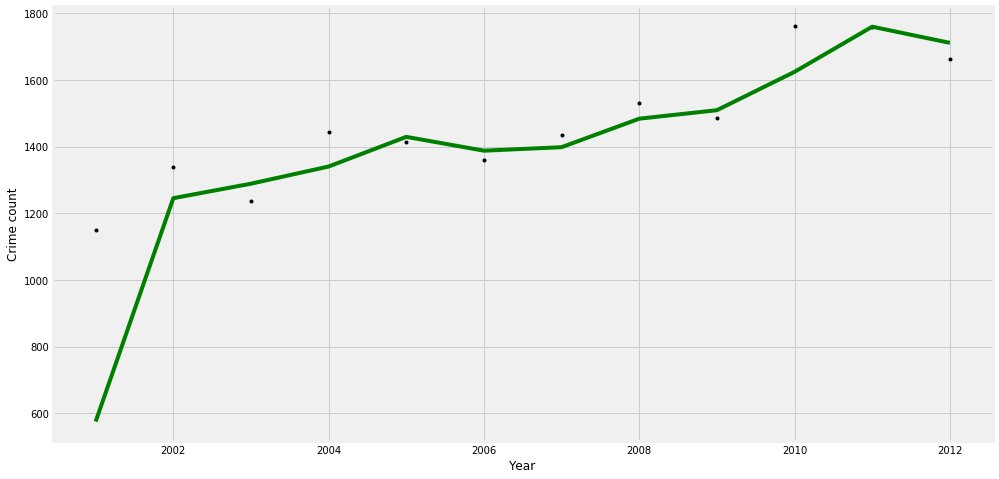

In [21]:
plt.figure(figsize=(15, 8))
plt.plot(x, Y, "k.")
plt.plot(x, moving_average, color='green')
plt.xlabel(text_xlabel)
plt.ylabel(text_ylabel)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
Year      12 non-null int64
Crimes    12 non-null int64
dtypes: int64(2)
memory usage: 320.0 bytes


In [23]:
data.describe()

,Year,Crimes
count,12.000000,12.000000
mean,2006.500000,1465.166667
std,3.605551,190.594683
min,2001.000000,1150.000000
25%,2003.750000,1355.000000
50%,2006.500000,1439.500000
75%,2009.250000,1564.250000
max,2012.000000,1761.000000


In [24]:
data['Crimes'].unique()

array([1150, 1340, 1237, 1443, 1415, 1360, 1436, 1531, 1487, 1761, 1758,
       1664], dtype=int64)

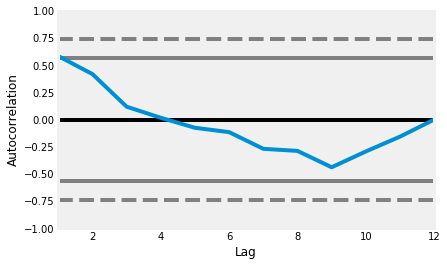

In [25]:
pd.plotting.autocorrelation_plot(data['Crimes'])
plt.show()

In [26]:
import statsmodels.api as sm
import seaborn as sns

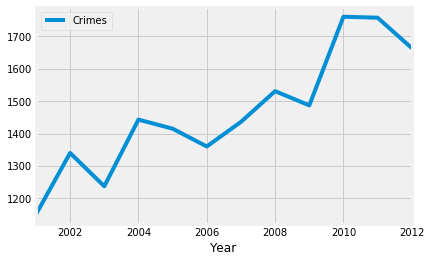

In [27]:
data.plot.line(x = 'Year', y = 'Crimes')
plt.show()

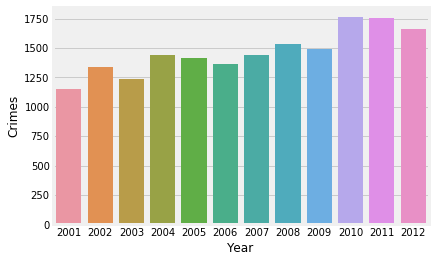

In [28]:
sns.barplot(x = 'Year', y = 'Crimes', data = data)
plt.show()

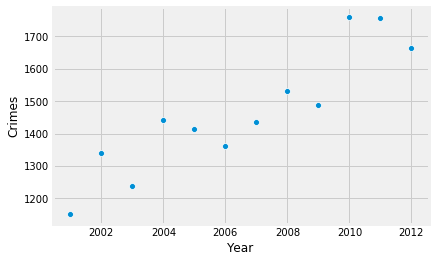

In [29]:
sns.scatterplot(x = 'Year', y = 'Crimes', data = data)
plt.show()

In [30]:
input_data = data['Crimes']

In [31]:
from statsmodels.tsa.ar_model import AR

In [32]:
X = data['Crimes']
len(X)

train, test = X[0:11], X[11:]

# train autoregression
model = AR(train)

model_fit = model.fit()

In [33]:
# make predictions
predictions = model_fit.predict(start=len(train), end=19, dynamic=True)

In [34]:
test

11    1664
Name: Crimes, dtype: int64

In [35]:
predictions

11    1765.257365
12    1935.951742
13    1884.113443
14    1902.291109
15    2162.689643
16    2097.730910
17    2243.673408
18    2461.116161
19    2346.592302
dtype: float64

In [36]:
performance = []
for i,j in predictions.items():
    performance.append(j)

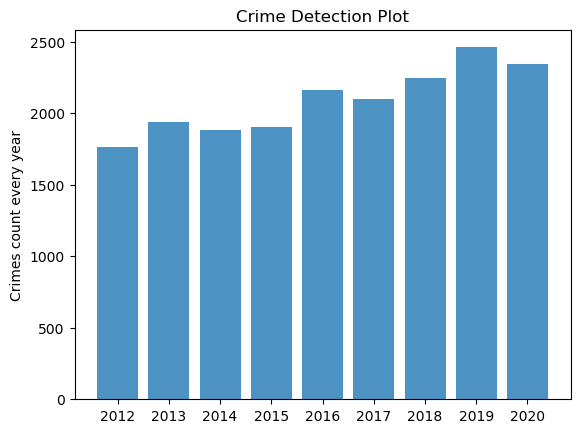

In [37]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('2012','2013','2014','2015','2016','2017','2018','2019','2020')
y_pos = np.arange(len(objects))


plt.bar(y_pos, performance, align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Crimes count every year')
plt.title('Crime Detection Plot')

plt.show()

In [38]:
count = 0
for i in performance:
    if i >= 3000:
        count += 1
if count <= 3:
    print('This city is safe for Women...')
else:
    print('This City is not safe for Women...')
    

This city is safe for Women...


# Thank You